<a href="https://colab.research.google.com/github/ismachy/Introduction-to-ML/blob/main/HW2_Problem1b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#using a modified version of Dr. Tabkhi's "LinearRegression" code found at: https://github.com/HamedTabkhi/Intro-to-ML/blob/main/IntroCodes/LinearRegression.ipynb
#using a modified version of Dr. Tabkhi's "Pre_Processing" code found at: https://github.com/HamedTabkhi/Intro-to-ML/blob/main/RegressionCode/Pre_Processing.ipynb
#using a modified version of Dr. Tabkhi's "DummyRegressionValidation" code found at: https://github.com/HamedTabkhi/Intro-to-ML/blob/main/RegressionCode/DummyRegressionValidation.ipynb

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
url = 'https://raw.githubusercontent.com/hurricane195/Intro-to-Machine-Learning/Datasets/Housing.csv'
#housing = pd.DataFrame(pd.read_csv(file_path))
housing = pd.read_csv(url)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
from IPython.display import display
display(housing)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [ ]:
# List of variables to map

varlist = ['mainroad','guestroom','basement','hotwaterheating','airconditioning', 'prefarea']
#furnishingList = ['furnishingstatus']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

"""
# Defining the map function
def furnishing_map(x):
    return x.map({'furnished': 2, 'semi-furnished': 1, 'unfurnished': 0})
"""

housing[varlist] = housing[varlist].apply(binary_map)
#housing[furnishingList] = housing[furnishingList].apply(furnishing_map)

housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [ ]:
# Separate features and labels

#Area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking, prefarea

X1 = housing.values[:,1]  # get AREA input values from the second column
X2 = housing.values[:,2]  # get BEDROOM input values from the third column
X3 = housing.values[:,3]  # get BATHROOM input values from the fourth column
X4 = housing.values[:,4]  # get STORIES input values from the fith column

X5 = housing.values[:,5]  # get MAINROAD input values from the sixth column
X6 = housing.values[:,6]  # get GUESTROOM input values from the seventh column
X7 = housing.values[:,7]  # get BASEMENT input values from the eight column
X8 = housing.values[:,8]  # get HOTWATERHEATING input values from the ninth column
X9 = housing.values[:,9]  # get AIRCONDITIONING input values from the tenth column
X10 = housing.values[:,10]  # get PARKING input values from the eleventh column
X11 = housing.values[:,11]  # get PREFAREA input values from the eleventh column

y = housing.values[:,0]  # get output values from fourth column -- Y is the list here
m = len(y)  # Number of training examples

# Display first 13 records and the total number of training examples
print('X1 = ', X1[: 5])
print('X2 = ', X2[: 5])
print('X3 = ', X3[: 5])
print('X4 = ', X4[: 5])
print('X5 = ', X5[: 5])

print('X6 = ', X6[: 5])
print('X7 = ', X7[: 5])
print('X8 = ', X8[: 5])
print('X9 = ', X9[: 5])
print('X10 = ', X10[: 5])
print('X11 = ', X11[: 5])

print('y = ', y[: 5])
print('m = ', m)



X1 =  [7420 8960 9960 7500 7420]
X2 =  [4 4 3 4 4]
X3 =  [2 4 2 2 1]
X4 =  [3 4 2 2 2]
X5 =  [1 1 1 1 1]
X6 =  [0 0 0 0 1]
X7 =  [0 0 1 1 1]
X8 =  [0 0 0 0 0]
X9 =  [1 1 0 1 1]
X10 =  [2 3 2 3 2]
X11 =  [1 0 1 1 0]
y =  [13300000 12250000 12250000 12215000 11410000]
m =  545


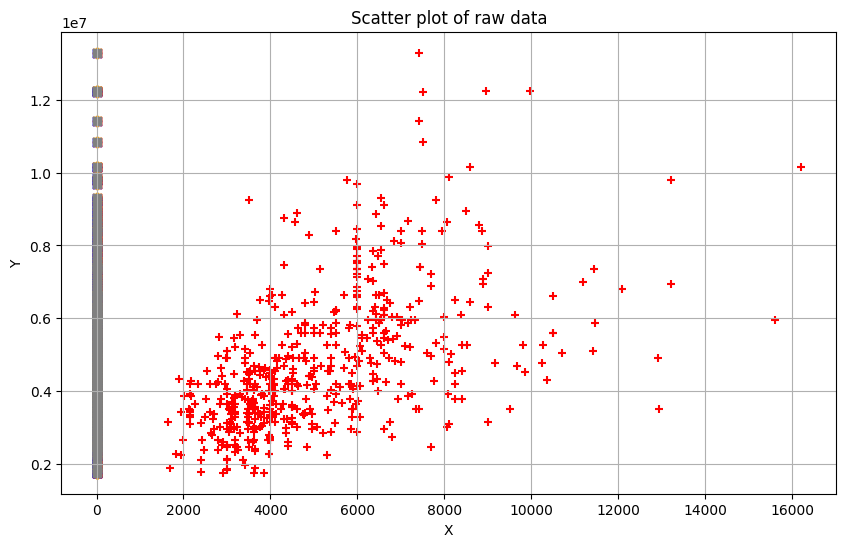

In [ ]:
# Scatter plot
plt.scatter(X1, y, color='red', marker='+')
plt.scatter(X2, y, color='blue', marker='x')
plt.scatter(X3, y, color='purple', marker='*')
plt.scatter(X4, y, color='orange', marker='o')
plt.scatter(X5, y, color='gray', marker='.')
plt.scatter(X6, y, color='brown', marker='>')
plt.scatter(X7, y, color='teal', marker='^')
plt.scatter(X8, y, color='pink', marker='d')
plt.scatter(X9, y, color='gold', marker='p')
plt.scatter(X10, y, color='lime', marker='v')
plt.scatter(X11, y, color='lavender', marker='s')

# Grid, labels, and title
plt.grid(True)
plt.rcParams["figure.figsize"] = (6, 6)
plt.xlabel('X')

plt.ylabel('Y')
plt.title('Scatter plot of raw data')

# Show the plot
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.8, test_size = 0.2, random_state = 100)

df_train.shape

(436, 13)

In [ ]:
df_test.shape

(109, 13)

In [ ]:
#df_train.head()

In [ ]:

from sklearn.preprocessing import MinMaxScaler, StandardScaler

#area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad','guestroom','basement', 'hotwaterheating', 'airconditioning','parking', 'prefarea']

df_newTrain=df_train[num_vars]
df_newTrain.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
22,8645000,8050,3,1,1,1,1,1,0,1,1,0
41,7840000,6360,3,2,4,1,0,0,0,1,0,1
91,6419000,6750,2,1,1,1,1,1,0,0,2,1
118,5950000,6420,3,1,1,1,0,1,0,1,0,1
472,3010000,3630,4,1,2,1,0,0,0,0,3,0


In [ ]:
df_newTrain.shape

(436, 12)

In [ ]:
df_newTest=df_test[num_vars]
df_newTest.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
265,4403000,2880,3,1,2,1,0,0,0,0,0,1
54,7350000,6000,3,2,2,1,1,0,0,1,1,0
171,5250000,10269,3,1,1,1,0,0,0,0,1,1
244,4550000,5320,3,1,2,1,1,1,0,0,0,1
268,4382000,4950,4,1,2,1,0,0,0,1,0,0


In [ ]:
df_newTest.shape

(109, 12)

In [ ]:
y_newTrain = df_newTrain.pop('price')
y_newTest=df_newTest.pop('price')

In [ ]:
y_newTrain.head()

22     8645000
41     7840000
91     6419000
118    5950000
472    3010000
Name: price, dtype: int64

In [ ]:
y_newTest.head()

265    4403000
54     7350000
171    5250000
244    4550000
268    4382000
Name: price, dtype: int64

In [ ]:
X_newTrain = df_newTrain
X_newTest = df_newTest

In [ ]:
X_newTrain.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
22,8050,3,1,1,1,1,1,0,1,1,0
41,6360,3,2,4,1,0,0,0,1,0,1
91,6750,2,1,1,1,1,1,0,0,2,1
118,6420,3,1,1,1,0,1,0,1,0,1
472,3630,4,1,2,1,0,0,0,0,3,0


In [ ]:
X_newTest.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
265,2880,3,1,2,1,0,0,0,0,0,1
54,6000,3,2,2,1,1,0,0,1,1,0
171,10269,3,1,1,1,0,0,0,0,1,1
244,5320,3,1,2,1,1,1,0,0,0,1
268,4950,4,1,2,1,0,0,0,1,0,0


In [ ]:
#We walk through the initial steps of building a linear regression model from scratch using NumPy. Let's break down what you're doing:
#X_0 = np.ones((m, 1)): We're creating a column vector of ones. This will be used as the "bias" term for the linear regression model.
#X_1 = X.reshape(m, 1): You're reshaping features (X) to make it a 2D array suitable for matrix operations.
#X = np.hstack((X_0, X_1)): We're horizontally stacking X_0 and X_1 to create final feature matrix X.

In [ ]:
X_0_train = np.ones((len(X_newTrain), 1))
X_0_train[:5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [ ]:
"""
X_newTrain = X_newTrain.reshape(len(X_newTrain), 1)
X_newTrain[:10]
"""

'\nX_newTrain = X_newTrain.reshape(len(X_newTrain), 1)\nX_newTrain[:10]\n'

In [ ]:
# Lets use hstack() function from numpy to stack X_0 and X_1 horizontally (i.e. column
# This will be our final X matrix (feature matrix)
xTrain = np.hstack((X_0_train, X_newTrain))
xTrain[:5]

array([[1.00e+00, 8.05e+03, 3.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 0.00e+00, 1.00e+00, 1.00e+00, 0.00e+00],
       [1.00e+00, 6.36e+03, 3.00e+00, 2.00e+00, 4.00e+00, 1.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00, 0.00e+00, 1.00e+00],
       [1.00e+00, 6.75e+03, 2.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 0.00e+00, 0.00e+00, 2.00e+00, 1.00e+00],
       [1.00e+00, 6.42e+03, 3.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        0.00e+00, 1.00e+00, 0.00e+00, 1.00e+00, 0.00e+00, 1.00e+00],
       [1.00e+00, 3.63e+03, 4.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 3.00e+00, 0.00e+00]])

In [ ]:
X_0_test = np.ones((len(X_newTest), 1))
X_0_test[:5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [ ]:
# Lets use hstack() function from numpy to stack X_0 and X_1 horizontally (i.e. column
# This will be our final X matrix (feature matrix)
xTest = np.hstack((X_0_test, X_newTest))
xTest[:5]

array([[1.0000e+00, 2.8800e+03, 3.0000e+00, 1.0000e+00, 2.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00],
       [1.0000e+00, 6.0000e+03, 3.0000e+00, 2.0000e+00, 2.0000e+00,
        1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        1.0000e+00, 0.0000e+00],
       [1.0000e+00, 1.0269e+04, 3.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 1.0000e+00],
       [1.0000e+00, 5.3200e+03, 3.0000e+00, 1.0000e+00, 2.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00],
       [1.0000e+00, 4.9500e+03, 4.0000e+00, 1.0000e+00, 2.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00]])

In [ ]:
theta = np.zeros(12)
theta

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
def compute_cost(xTrain, y_newTrain, theta):
    """
    Compute cost for linear regression.

    Parameters:
    X : 2D array where each row represents the training example and each column represent the feature
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta : 1D array of fitting parameters or weights. Dimension (n)

    Returns:
    J : Scalar value, the cost
    """
    predictions = xTrain.dot(theta)
    errors = np.subtract(predictions, y_newTrain)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

In [ ]:
# Lets compute the cost for theta values
cost = compute_cost(xTrain, y_newTrain, theta)
print('The cost for given values of theta_0 through theta_10 =', cost)

The cost for given values of theta_0 through theta_10 = 10591039921769.357


In [ ]:
def compute_cost(xTest, y_newTest, theta):
    """
    Compute cost for linear regression.

    Parameters:
    X : 2D array where each row represents the training example and each column represent the feature
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta : 1D array of fitting parameters or weights. Dimension (n)

    Returns:
    J : Scalar value, the cost
    """
    predictions = xTest.dot(theta)
    errors = np.subtract(predictions, y_newTest)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

In [ ]:
# Lets compute the cost for theta values
cost = compute_cost(xTest, y_newTest, theta)
print('The cost for given values of theta_0 through theta_5 =', cost)

The cost for given values of theta_0 through theta_5 = 2515876442889.908


In [ ]:
def gradient_descent(xTrain, y_newTrain, theta, alpha, iterations):
    """
    Compute the optimal parameters using gradient descent for linear regression.

    Parameters:
    X : 2D array where each row represents the training example and each column represents the feature
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta : 1D array of fitting parameters or weights. Dimension (n)
    alpha : Learning rate (scalar)
    iterations : Number of iterations (scalar)

    Returns:
    theta : Updated values of fitting parameters or weights after 'iterations' iterations. Dimension (n)
    cost_history : Array containing the cost for each iteration. Dimension (iterations)
    """

    m = len(y)  # Number of training examples
    cost_history = np.zeros(iterations)
    test_cost_history = np.zeros(iterations)

    for i in range(iterations):
        predictions = xTrain.dot(theta)
        errors = np.subtract(predictions, y_newTrain)
        sum_delta = (alpha / len(X_newTrain)) * xTrain.transpose().dot(errors)
        theta -= sum_delta
        cost_history[i] = compute_cost(xTrain, y_newTrain, theta)
        test_cost_history[i] = compute_cost(xTest, y_newTest, theta)

    return theta, cost_history, test_cost_history

In [ ]:
theta = [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]
iterations = 50
alpha = 0.00000001

In [ ]:
theta, cost_history, test_cost_history= gradient_descent(xTrain, y_newTrain, theta, alpha, iterations)
print('Final value of theta =', theta)
print('cost_history =', cost_history)

Final value of theta = [3.23090493e-01 8.61913705e+02 1.10657046e+00 5.87672510e-01
 8.74688549e-01 2.84022982e-01 9.78667526e-02 1.60521526e-01
 4.16601430e-02 2.02196638e-01 2.62751111e-01 1.11946392e-01]
cost_history = [5.73916190e+12 3.43526965e+12 2.34127688e+12 1.82179936e+12
 1.57512780e+12 1.45799692e+12 1.40237783e+12 1.37596734e+12
 1.36342642e+12 1.35747140e+12 1.35464367e+12 1.35330092e+12
 1.35266330e+12 1.35236051e+12 1.35221671e+12 1.35214841e+12
 1.35211596e+12 1.35210053e+12 1.35209319e+12 1.35208968e+12
 1.35208800e+12 1.35208718e+12 1.35208677e+12 1.35208656e+12
 1.35208644e+12 1.35208636e+12 1.35208631e+12 1.35208626e+12
 1.35208622e+12 1.35208619e+12 1.35208615e+12 1.35208611e+12
 1.35208608e+12 1.35208604e+12 1.35208600e+12 1.35208597e+12
 1.35208593e+12 1.35208590e+12 1.35208586e+12 1.35208583e+12
 1.35208579e+12 1.35208575e+12 1.35208572e+12 1.35208568e+12
 1.35208565e+12 1.35208561e+12 1.35208557e+12 1.35208554e+12
 1.35208550e+12 1.35208547e+12]


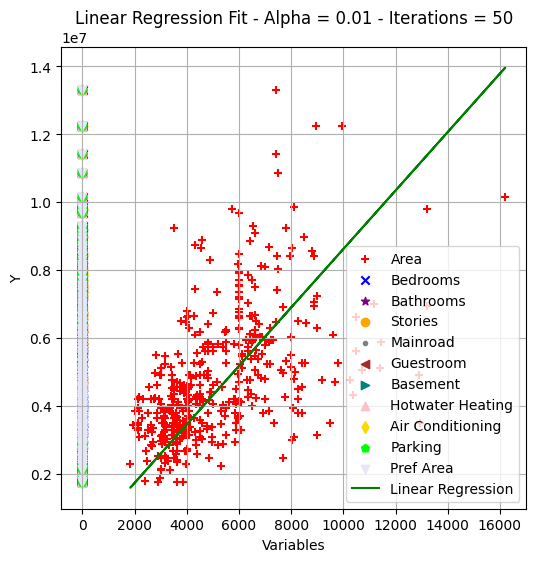

In [ ]:
# Scatter plot
#Area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking, prefarea
plt.scatter(xTrain[:,1], y_newTrain, color='red', marker='+', label='Area')
plt.scatter(xTrain[:,2], y_newTrain, color='blue', marker='x', label='Bedrooms')
plt.scatter(xTrain[:,3], y_newTrain, color='purple', marker='*', label='Bathrooms')
plt.scatter(xTrain[:,4], y_newTrain, color='orange', marker='o', label='Stories')
plt.scatter(xTrain[:,5], y_newTrain, color='gray', marker='.', label='Mainroad')
plt.scatter(xTrain[:,6], y_newTrain, color='brown', marker='<', label='Guestroom')
plt.scatter(xTrain[:,7], y_newTrain, color='teal', marker='>', label='Basement')
plt.scatter(xTrain[:,8], y_newTrain, color='pink', marker='^', label='Hotwater Heating')
plt.scatter(xTrain[:,9], y_newTrain, color='gold', marker='d', label='Air Conditioning')
plt.scatter(xTrain[:,10], y_newTrain, color='lime', marker='p', label='Parking')
plt.scatter(xTrain[:,11], y_newTrain, color='lavender', marker='v', label='Pref Area')


# Line plot for the linear regression model
plt.plot(xTrain[:, 1], xTrain.dot(theta), color='green', label='Linear Regression')

# Plot customizations
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)
plt.xlabel('Variables')
plt.ylabel('Y')
plt.title('Linear Regression Fit - Alpha = 0.01 - Iterations = 50')
plt.legend()

# Show the plot
plt.show()

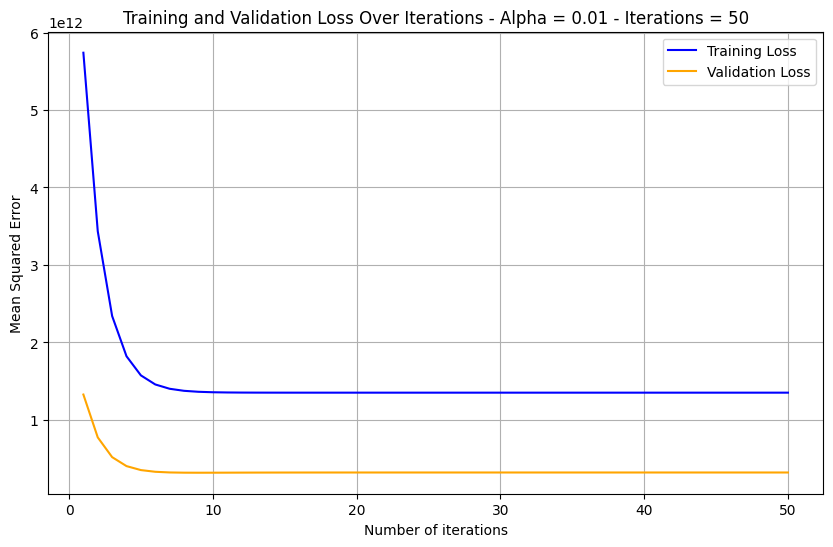

In [ ]:
plt.plot(range(1, iterations + 1), cost_history, color='blue', label= 'Training Loss')
plt.plot(range(1, iterations + 1), test_cost_history, color='orange', label= 'Validation Loss')
plt.legend()
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Mean Squared Error')
plt.title('Training and Validation Loss Over Iterations - Alpha = 0.01 - Iterations = 50')

# Show the plot
plt.show()